In [184]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data_df= pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)


# Combine the data into a single dataset
combined_data_df = pd.merge(ride_data_df, city_data_df, how='left', on='city')

# Display the data table for preview


In [205]:
combined_data_df.dtypes

city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

In [185]:
combined_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [186]:
city_urban_df = combined_data_df.loc[combined_data_df["type"]=="Urban"]

In [187]:
city_suburban_df = combined_data_df.loc[combined_data_df["type"]=="Suburban"]

In [188]:
city_rural_df = combined_data_df.loc[combined_data_df["type"]=="Rural"]

In [189]:
city_urban_ridecount = city_urban_df.groupby(["city"]).count()["ride_id"]

In [190]:
city_suburban_ridecount = city_suburban_df.groupby(["city"]).count()["ride_id"]

In [191]:
city_rural_ridecount = city_rural_df.groupby(["city"]).count()["ride_id"]

In [192]:
urban_avg = city_urban_df.groupby(["city"]).mean()["fare"]

In [193]:
suburban_avg = city_suburban_df.groupby(["city"]).mean()["fare"]

In [194]:
rural_avg = city_rural_df.groupby(["city"]).mean()["fare"]

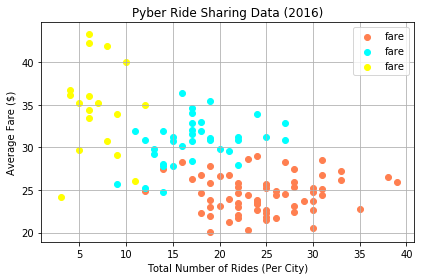

In [315]:
urban = plt.scatter(city_urban_ridecount, urban_avg, color="coral")
suburban = plt.scatter(city_suburban_ridecount, suburban_avg, color="cyan")
rural = plt.scatter(city_rural_ridecount, rural_avg, color="yellow")

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
plt.legend(handles=[urban, suburban, rural], loc="best")
plt.tight_layout()
plt.savefig("../Images/pyber_starter.png")
plt.show()


In [196]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


## Total Fares by City Type

In [213]:
total_fare = combined_data_df['fare'].sum()

In [245]:
urban_fare = city_urban_df.groupby(["type"]).sum()["fare"]

In [247]:
suburban_fare = city_suburban_df.groupby(["type"]).sum()["fare"]

In [248]:
rural_fare = city_rural_df.groupby(["type"]).sum()["fare"]

In [249]:
# Calculate Type Percents
# total fares/number of city type * 100
#add up urban fares/total fares
total_fares_perc_urban = (urban_fare/total_fare) * 100
total_fares_perc_suburban = (suburban_fare/total_fare) * 100
total_fares_perc_rural = (rural_fare/total_fare) * 100


# Build Pie Chart

# Save Figure


In [306]:
labels = ["Urban", "Rural", "Suburban"]
colors = ["coral", "yellow", "cyan"]
explode = (0.1, 0, 0)
fares = (total_fares_perc_urban, total_fares_perc_rural, total_fares_perc_suburban)

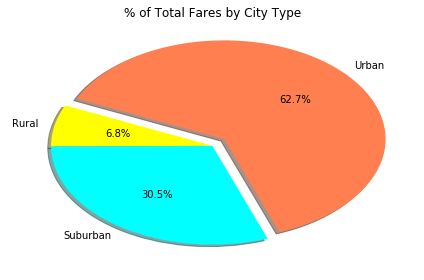

In [316]:
plt.pie(fares, explode=explode, labels=labels, autopct="%1.1f%%", colors=colors, shadow=True, startangle=290)
plt.title("% of Total Fares by City Type")
plt.tight_layout()
plt.savefig("../Images/pyber_pie_total_fare.png")
plt.show()

## Total Rides by City Type

In [136]:
urban_count = city_urban_ridecount.sum()

In [137]:
suburban_count = city_suburban_ridecount.sum()

In [138]:
rural_count = city_rural_ridecount.sum()

In [139]:
total_ridecount = (urban_count+suburban_count+rural_count)

In [140]:
# Calculate Ride Percents
total_rides_perc_urban = (urban_count/total_ridecount) * 100
total_rides_perc_suburban = (suburban_count/total_ridecount) * 100
total_rides_perc_rural = (rural_count/total_ridecount) * 100

# Build Pie Chart

# Save Figure


In [304]:
labels = ["Urban", "Rural", "Suburban"]
colors = ["coral", "yellow", "cyan"]
explode = (0.1, 0, 0)
rides = (total_rides_perc_urban, total_rides_perc_rural, total_rides_perc_suburban)

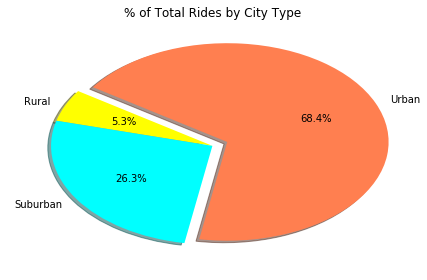

In [317]:
plt.pie(rides, explode=explode, labels=labels, autopct="%1.1f%%", colors=colors, shadow=True, startangle=260)
plt.title("% of Total Rides by City Type")
plt.tight_layout()
plt.savefig("../Images/pyber_pie_total_rides.png")
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


In [228]:
total_driver_count = combined_data_df['driver_count'].sum()

In [254]:
urban_driver_count = city_urban_df.groupby(["type"]).sum()["driver_count"]

In [256]:
suburban_driver_count = city_suburban_df.groupby(["type"]).sum()["driver_count"]

In [258]:
rural_driver_count = city_rural_df.groupby(["type"]).sum()["driver_count"]

In [263]:
total_drivers_perc_urban = (urban_driver_count/total_driver_count) * 100
total_drivers_perc_suburban = (suburban_driver_count/total_driver_count) * 100
total_drivers_perc_rural = (rural_driver_count/total_driver_count) * 100

In [297]:
labels = ["Urban", "Rural", "Suburban"]
colors = ["coral", "yellow", "cyan"]
explode = (0.1, 0, 0)
drivers = (total_drivers_perc_urban, total_drivers_perc_rural, total_drivers_perc_suburban)

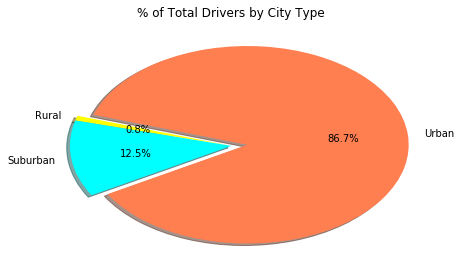

In [318]:
plt.pie(drivers, explode=explode, labels=labels, autopct="%1.1f%%", colors=colors, shadow=True, startangle=210)
plt.title("% of Total Drivers by City Type")
plt.tight_layout()
plt.savefig("../Images/pyber_pie_total_drivers.png")
plt.show()